# EDA - Car Price Prediction (Option A)

This notebook explores the processed car sale ads dataset and produces the same visual set used in the project report. Run after generating the processed parquet via `python3 -m src.pipeline`.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
from src import config
from src.utils import ensure_directory


In [2]:
processed_path = config.PROCESSED_DATA_PATH
print(f'Loading processed data from {processed_path}')
if not processed_path.exists():
    raise FileNotFoundError('Run python3 -m src.pipeline first to create processed data.')
df = pd.read_parquet(processed_path)
df.shape


Loading processed data from artifacts/processed/car_ads_processed.parquet


(207263, 58)

In [3]:
display(df.head())
df.dtypes


,price,currency,condition,brand,model,version,generation,production_year,mileage_km,power_hp,...,feat_automatic_air_conditioning,feat_isofix,feat_front_side_airbags,feat_fog_lights,feat_electric_rear_windows,is_first_owner,vehicle_age,mileage_per_year,brand_popularity,model_popularity
0,86200,PLN,New,Abarth,595,Unknown,Unknown,2021,1.0,145.0,...,0,0,0,0,0,0,0.5,2.000000,0.000285,0.393582
1,43500,PLN,Used,Abarth,Other,Unknown,Unknown,1974,59000.0,75.0,...,0,0,0,0,0,0,47.0,1255.319149,0.000285,0.393582
2,44900,PLN,Used,Abarth,500,Unknown,Unknown,2018,52000.0,180.0,...,1,0,0,0,0,0,3.0,17333.333333,0.000285,0.003020
3,39900,PLN,Used,Abarth,500,Unknown,Unknown,2012,29000.0,160.0,...,1,0,1,0,0,0,9.0,3222.222222,0.000285,0.003020
4,97900,PLN,New,Abarth,595,Unknown,Unknown,2021,600.0,165.0,...,1,1,1,0,0,0,0.5,1200.000000,0.000285,0.393582


price                                            int64
currency                                        object
condition                                       object
brand                                           object
model                                           object
version                                         object
generation                                      object
production_year                                  int64
mileage_km                                     float64
power_hp                                       float64
displacement_cm3                               float64
fuel_type                                       object
co2_emissions                                  float64
drive                                           object
transmission                                    object
vehicle_type                                    object
doors_number                                     int64
colour                                          object
origin_cou

In [4]:
missing = df.isna().mean().sort_values(ascending=False)
missing.head(12)


first_registration_date                 0.58517
price                                   0.00000
feat_esp_stabilization_of_the_track     0.00000
location_capped                         0.00000
feat_abs                                0.00000
feat_central_locking                    0.00000
feat_electric_front_windows             0.00000
feat_drivers_airbag                     0.00000
feat_power_steering                     0.00000
feat_passengers_airbag                  0.00000
feat_electrically_adjustable_mirrors    0.00000
feat_factory_radio                      0.00000
dtype: float64

Set plotting defaults and ensure figure directory exists.

In [5]:
fig_dir = config.FIGURES_DIR
ensure_directory(fig_dir)
sns.set_theme(style='ticks')


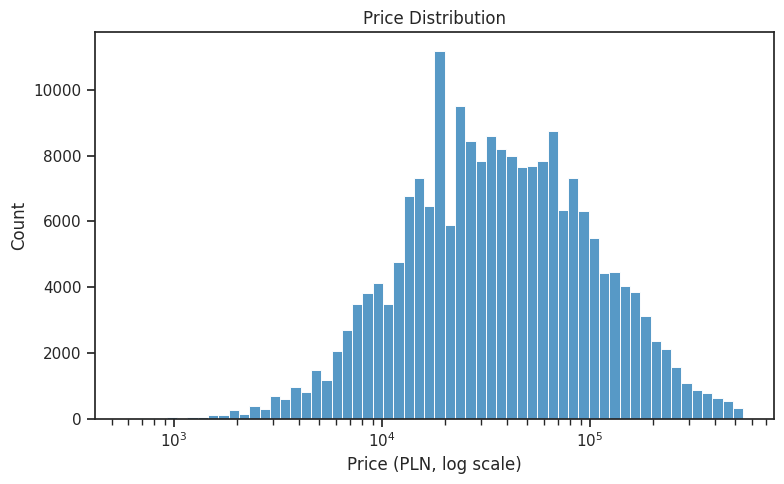

In [6]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price_pln'], bins=60, log_scale=True, color='#1f77b4')
plt.xlabel('Price (PLN, log scale)')
plt.ylabel('Count')
plt.title('Price Distribution')
plt.tight_layout()
plt.savefig(fig_dir / 'price_distribution.png', bbox_inches='tight')
plt.show()


/tmp/ipykernel_94540/3652251088.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')


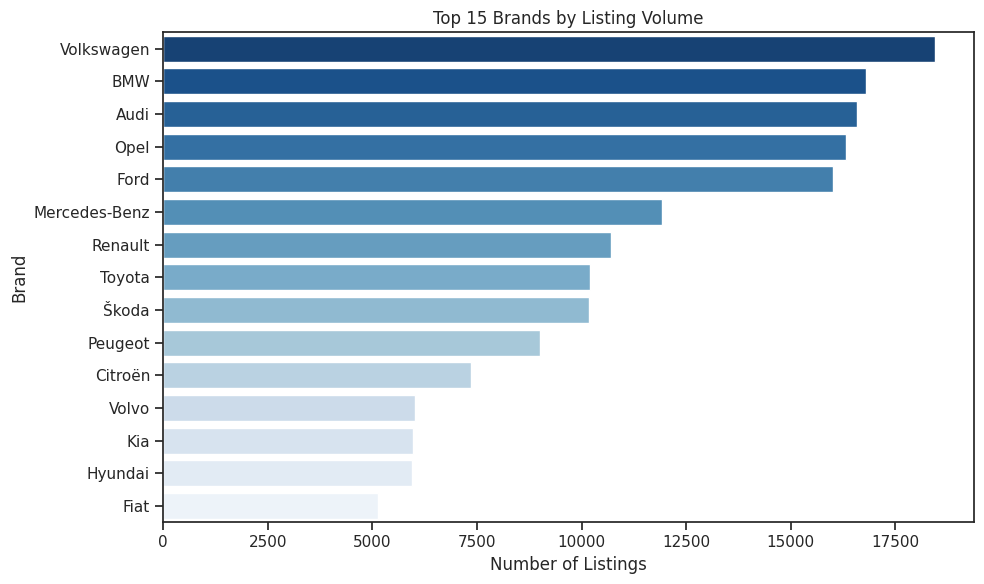

In [7]:
top_brands = df['brand'].value_counts().head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_brands.values, y=top_brands.index, palette='Blues_r')
plt.xlabel('Number of Listings')
plt.ylabel('Brand')
plt.title('Top 15 Brands by Listing Volume')
plt.tight_layout()
plt.savefig(fig_dir / 'top_brands.png', bbox_inches='tight')
plt.show()


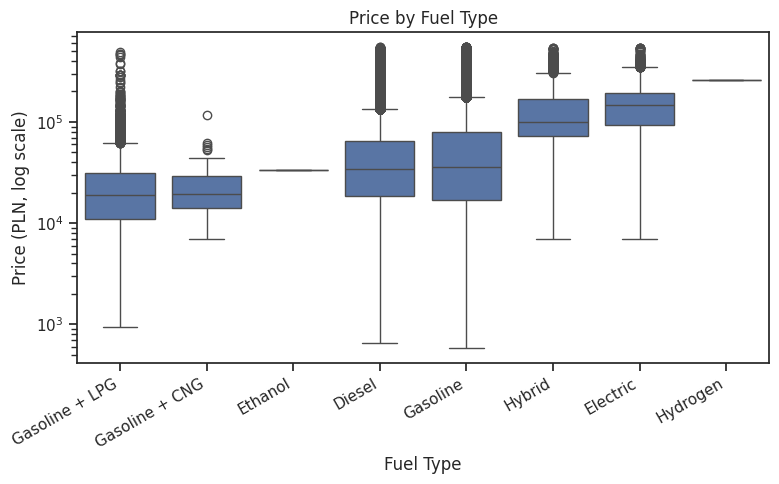

In [8]:
plt.figure(figsize=(8, 5))
order = df.groupby('fuel_type')['price_pln'].median().sort_values().index
sns.boxplot(data=df, x='fuel_type', y='price_pln', order=order)
plt.xticks(rotation=30, ha='right')
plt.yscale('log')
plt.xlabel('Fuel Type')
plt.ylabel('Price (PLN, log scale)')
plt.title('Price by Fuel Type')
plt.tight_layout()
plt.savefig(fig_dir / 'price_by_fuel.png', bbox_inches='tight')
plt.show()


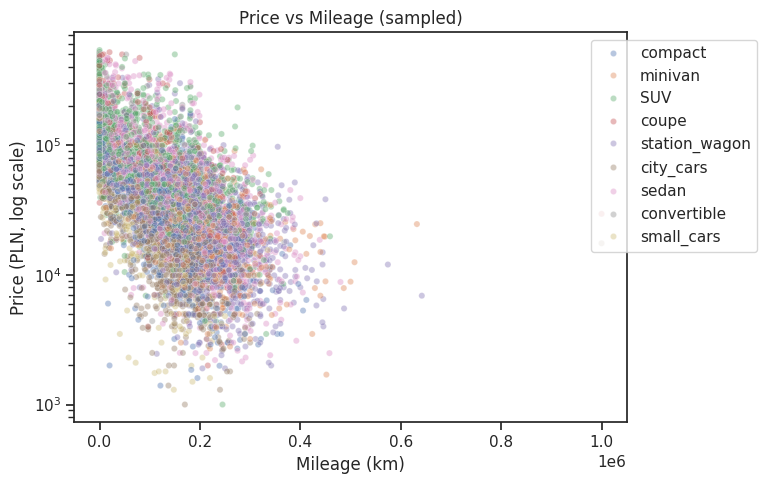

In [9]:
sample = df.sample(min(len(df), 8000), random_state=42)
plt.figure(figsize=(8, 5))
sns.scatterplot(data=sample, x='mileage_km', y='price_pln', hue='vehicle_type', alpha=0.4, s=20)
plt.yscale('log')
plt.xlabel('Mileage (km)')
plt.ylabel('Price (PLN, log scale)')
plt.title('Price vs Mileage (sampled)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.tight_layout()
plt.savefig(fig_dir / 'price_vs_mileage.png', bbox_inches='tight')
plt.show()


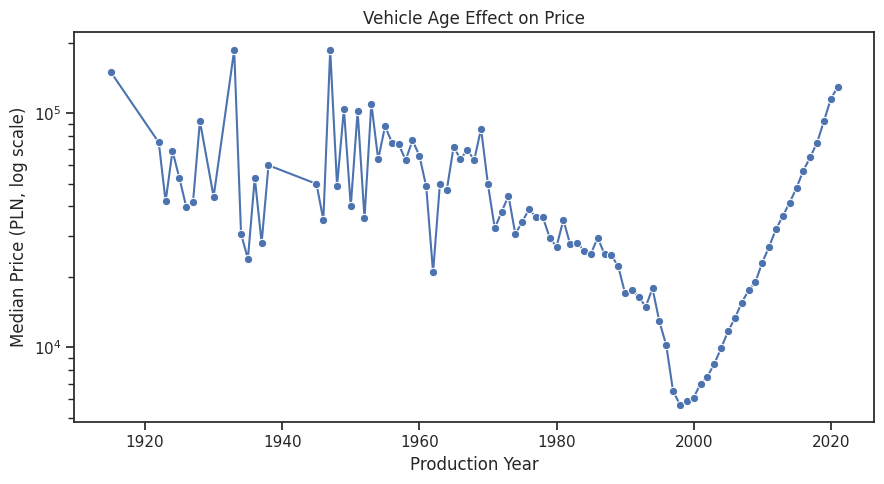

In [10]:
grouped = df.groupby('production_year')['price_pln'].median().reset_index()
plt.figure(figsize=(9, 5))
sns.lineplot(data=grouped, x='production_year', y='price_pln', marker='o')
plt.yscale('log')
plt.xlabel('Production Year')
plt.ylabel('Median Price (PLN, log scale)')
plt.title('Vehicle Age Effect on Price')
plt.tight_layout()
plt.savefig(fig_dir / 'age_effect.png', bbox_inches='tight')
plt.show()


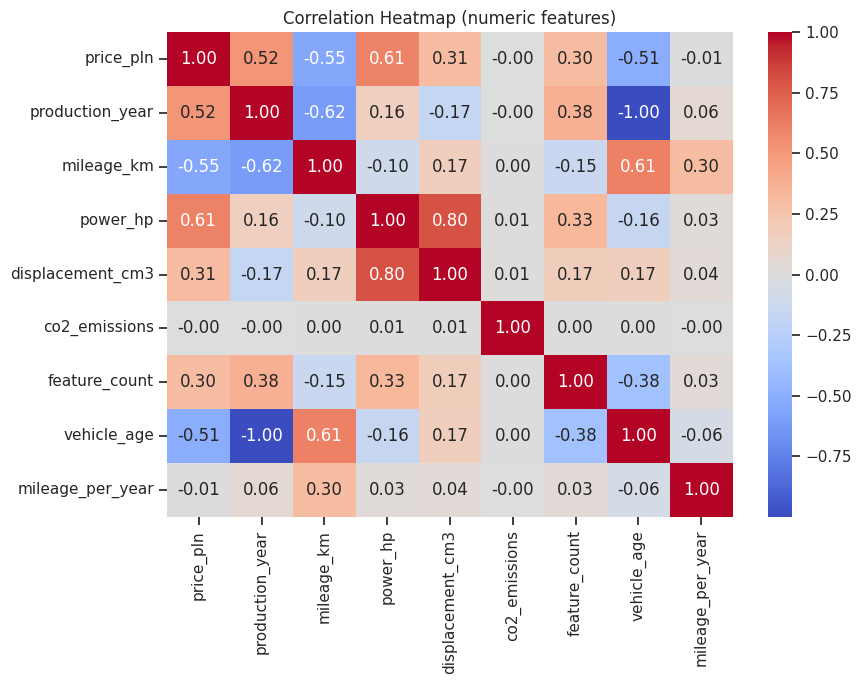

In [11]:
numeric_cols = [
    'price_pln',
    'production_year',
    'mileage_km',
    'power_hp',
    'displacement_cm3',
    'co2_emissions',
    'feature_count',
    'vehicle_age',
    'mileage_per_year',
]
corr = df[numeric_cols].corr(numeric_only=True)
plt.figure(figsize=(9, 7))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Correlation Heatmap (numeric features)')
plt.tight_layout()
plt.savefig(fig_dir / 'correlation_heatmap.png', bbox_inches='tight')
plt.show()
